# Imported Libraries

In [18]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime


# Load and preview log data

In [3]:
# plotting style
sns.set(style = "whitegrid")

#load and preview log data

with open("calgary_access_log", "r", encoding="utf-8", errors="ignore") as file:
    lines = file.readlines()

    
print("sample log line:")
print(lines[0])
    


sample log line:
local - - [24/Oct/1994:13:41:41 -0600] "GET index.html HTTP/1.0" 200 150



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665314 entries, 0 to 665313
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype                    
---  ------    --------------   -----                    
 0   ip        665314 non-null  object                   
 1   datetime  399865 non-null  datetime64[ns, UTC-06:00]
 2   method    665314 non-null  object                   
 3   url       665314 non-null  object                   
 4   protocol  665314 non-null  object                   
 5   status    665314 non-null  int64                    
 6   size      665314 non-null  int64                    
 7   hour      399865 non-null  datetime64[ns, UTC-06:00]
 8   date      399865 non-null  object                   
dtypes: datetime64[ns, UTC-06:00](2), int64(2), object(5)
memory usage: 45.7+ MB


### Dataset consists of 666514 rows and 9 columns in which datetime, hour and date contains null values

# Basic EDA

In [15]:
df.columns # columns in the dataset

Index(['ip', 'datetime', 'method', 'url', 'protocol', 'status', 'size', 'hour',
       'date'],
      dtype='object')

In [52]:
df['ip'].unique() # two ip's are there in the dataset categorized as local and remote  

array(['local', 'remote'], dtype=object)

In [53]:
df['ip'].value_counts()

ip
local     339260
remote    326054
Name: count, dtype: int64

In [54]:
df['datetime'].unique()

<DatetimeArray>
['1994-10-24 19:41:41+00:00', '1994-10-24 19:43:13+00:00',
 '1994-10-24 19:43:14+00:00', '1994-10-24 19:43:15+00:00',
 '1994-10-24 19:43:17+00:00', '1994-10-24 19:46:45+00:00',
 '1994-10-24 19:46:47+00:00', '1994-10-24 19:46:50+00:00',
 '1994-10-24 19:47:19+00:00', '1994-10-24 19:47:41+00:00',
 ...
 '1995-10-11 20:07:28+00:00', '1995-10-11 20:07:30+00:00',
 '1995-10-11 20:09:41+00:00', '1995-10-11 20:10:57+00:00',
 '1995-10-11 20:10:58+00:00', '1995-10-11 20:10:59+00:00',
 '1995-10-11 20:11:38+00:00', '1995-10-11 20:11:39+00:00',
 '1995-10-11 20:11:40+00:00', '1995-10-11 20:14:17+00:00']
Length: 560319, dtype: datetime64[ns, UTC]

In [56]:
df['method'].value_counts() # three types of method are present in which GET is highest

method
GET     664779
HEAD       518
POST        17
Name: count, dtype: int64

### Three types of method are present in which GET is highest -- 664779

In [57]:
df['url'].unique()

array(['index.html', '1.gif', '2.gif', ..., '12178.gif', '11624.html',
       '12179.gif'], dtype=object)

In [59]:
df['url'].nunique() # total 8661 urls

8661

In [58]:
df['url'].value_counts()

url
index.html          104136
3.gif                24005
2.gif                23595
4.gif                 8017
244.gif               5145
                     ...  
8173.map?29,21           1
8174.map?369,278         1
8175.map?76,22           1
8176.map?374,275         1
12179.gif                1
Name: count, Length: 8661, dtype: int64

### index.html has highest counts followed by 3.gif

In [61]:
df['protocol'].unique()

array(['HTTP/1.0', 'HTTP/V1.0', '-- University Of Calgary HTTP/1.0',
       'Wed Jul 6 14:51:13 1994 HTTP/1.0', 'Grouplab Home Page HTTP/1.0',
       'GroupLab Papers HTTP/1.0', 'GroupLab People HTTP/1.0',
       'GroupLab Projects HTTP/1.0', '-- University of Calgary HTTP/1.0',
       'A crumbling shack... HTTP/1.0', '~mildred/451 HTTP/1.0',
       'tm-op.mpg HTTP/1.0', 'ALT= HTTP/1.0',
       'BORDER=0 WIDTH=90 HEIGHT=45 HTTP/1.0',
       'BORDER=90 WIDTH=90 HEIGHT=45 HTTP/1.0',
       'BORDER=900 WIDTH=90 HEIGHT=45 HTTP/1.0',
       '//www.cadence.com HTTP/1.0', '// //www.cadence.com/ HTTP/1.0',
       'csus HTTP/1.0', '&LT irvine &GT HTTP/1.0', 'mitsugi HTTP/1.0',
       '//www.cpsc.ucalgary.ca/~mildred/451 HTTP/1.0',
       '//www.cpsc.ucalgary.ca/~mildred/ //www.cpsc.ucalgary.ca/~mildred/451 HTTP/1.0',
       '//www.cpsc.ucalgary.ca/~mildred/ //www.cpsc.ucalgary.ca/~mildred/ //www.cpsc.ucalgary.ca/~mildred/451 HTTP/1.0',
       'p 1 HTTP/1.0', 'align=left hspace=10 HTTP/1.0', 'am

In [63]:
df['status'].unique()

array([200, 304, 302, 500, 403], dtype=int64)

In [65]:
df['status'].value_counts()

status
200    566858
304     97792
302       640
500        22
403         2
Name: count, dtype: int64

In [67]:
df['size'].value_counts()

size
0        99107
2555     21166
36403    19199
2881     12085
441       7955
         ...  
18478        1
18480        1
12863        1
18501        1
11027        1
Name: count, Length: 10190, dtype: int64

* 99,107 requests returned 0 bytes
* The most common sizes (like 2555, 36403) may represent frequently accessed static files.


In [70]:
df['hour'].value_counts()

hour
1995-09-21 22:00:00+00:00    914
1995-02-07 22:00:00+00:00    782
1995-03-21 00:00:00+00:00    758
1995-04-07 19:00:00+00:00    741
1995-03-23 21:00:00+00:00    719
                            ... 
1994-11-12 10:00:00+00:00      1
1994-12-04 16:00:00+00:00      1
1995-03-16 10:00:00+00:00      1
1995-09-06 05:00:00+00:00      1
1994-11-23 13:00:00+00:00      1
Name: count, Length: 8250, dtype: int64

# Checking for the null values in the dataset

In [17]:
print(df.isnull().sum())

ip               0
datetime    265449
method           0
url              0
protocol         0
status           0
size             0
hour        265449
date        265449
dtype: int64


### There are 265449 null values in datetime,hour, and date columns

# Data Cleaning  

In [24]:
df = df.dropna(subset=['datetime']) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665314 entries, 0 to 665313
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   ip        665314 non-null  object             
 1   datetime  665314 non-null  datetime64[ns, UTC]
 2   method    665314 non-null  object             
 3   url       665314 non-null  object             
 4   protocol  665314 non-null  object             
 5   status    665314 non-null  int64              
 6   size      665314 non-null  int64              
 7   hour      665314 non-null  int32              
 8   date      665314 non-null  object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(5)
memory usage: 43.1+ MB


# Used regex and parsed lines

In [26]:
pattern = re.compile(
    r'(?P<ip>\S+) \S+ \S+ \[(?P<datetime>[^\]]+)\] '
    r'"(?P<method>\S+) (?P<url>\S+) (?P<protocol>[^"]+)" '
    r'(?P<status>\d{3}) (?P<size>\d+)'
)

data = []

with open("calgary_access_log", "r", encoding="utf-8", errors="ignore") as file:
    for line in file:
        match = pattern.match(line)
        if match:
            entry = match.groupdict()
            try:
                entry['datetime'] = datetime.strptime(entry['datetime'], "%d/%b/%Y:%H:%M:%S %z")
                entry['status'] = int(entry['status'])
                entry['size'] = int(entry['size'])
            except Exception:
                continue  # Skip lines with parsing issues
            data.append(entry)

df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)   # Fix timezone issue
df['hour'] = df['datetime'].dt.hour
df['date'] = df['datetime'].dt.date


In [27]:
df

,ip,datetime,method,url,protocol,status,size,hour,date
0,local,1994-10-24 19:41:41+00:00,GET,index.html,HTTP/1.0,200,150,19,1994-10-24
1,local,1994-10-24 19:41:41+00:00,GET,1.gif,HTTP/1.0,200,1210,19,1994-10-24
2,local,1994-10-24 19:43:13+00:00,GET,index.html,HTTP/1.0,200,3185,19,1994-10-24
3,local,1994-10-24 19:43:14+00:00,GET,2.gif,HTTP/1.0,200,2555,19,1994-10-24
4,local,1994-10-24 19:43:15+00:00,GET,3.gif,HTTP/1.0,200,36403,19,1994-10-24
...,...,...,...,...,...,...,...,...,...
665309,local,1995-10-11 20:10:59+00:00,GET,12158.gif,HTTP/1.0,304,0,20,1995-10-11
665310,local,1995-10-11 20:11:38+00:00,GET,index.html,HTTP/1.0,200,3020,20,1995-10-11
665311,local,1995-10-11 20:11:39+00:00,GET,2.gif,HTTP/1.0,200,2555,20,1995-10-11
665312,local,1995-10-11 20:11:40+00:00,GET,3.gif,HTTP/1.0,200,36403,20,1995-10-11


### Top 10 IP's, Top 10 URL's

In [6]:
# Top 10 IP's, Top 10 URL's

print("Top 10 IPs:\n", df['ip'].value_counts().head(10)) # top 10 ip's
print("\nTop 10 URLs:\n", df['url'].value_counts().head(10)) # top 10 url's
print("\nHTTP Status Code Distribution:\n", df['status'].value_counts())


Top 10 IPs:
 ip
local     339260
remote    326054
Name: count, dtype: int64

Top 10 URLs:
 url
index.html    104136
3.gif          24005
2.gif          23595
4.gif           8017
244.gif         5145
5.html          5010
4097.gif        4865
8870.jpg        4489
6733.gif        4278
8472.gif        3843
Name: count, dtype: int64

HTTP Status Code Distribution:
 status
200    566858
304     97792
302       640
500        22
403         2
Name: count, dtype: int64


# Top 10 IP's
* The IP addresses are categorized as "local" and "remote" instead of showing individual IPs.
* The traffic is almost evenly split between these two groups, indicating a balanced distribution of requests.
* Since specific IP addresses are not available, detailed client-level analysis is limited.
However, this split can help understand general traffic sources and potential load from local versus remote users.

# Top 10 URL's
* The most requested resource is "index.html", which is typical as it often represents the website’s homepage.
* Image files (mostly '.gif' and '.jpg') make up the majority of the other top requests, indicating high demand for media content.
* The large number of requests for GIF files suggests either an image-heavy website or frequent use of animated images.


# Http Status code distribution
* Most requests (~567K) were successful (200) — healthy traffic.

* Large number of 304 means caching is effective, clients often use cached content.

* A small number of redirects (302).

* Very few errors (500 & 403), so server and permissions are mostly fine.

In [8]:
# Error Analysis
error_df = df[df['status'] >= 400]
print("Error Requests Summary:\n", error_df['status'].value_counts())


Error Requests Summary:
 status
500    22
403     2
Name: count, dtype: int64


### Error Request Summary 
Very few errors (500 & 403), so server and permissions are mostly fine.

In [37]:
df['datetime'].unique()

<DatetimeArray>
['1994-10-24 19:41:41+00:00', '1994-10-24 19:43:13+00:00',
 '1994-10-24 19:43:14+00:00', '1994-10-24 19:43:15+00:00',
 '1994-10-24 19:43:17+00:00', '1994-10-24 19:46:45+00:00',
 '1994-10-24 19:46:47+00:00', '1994-10-24 19:46:50+00:00',
 '1994-10-24 19:47:19+00:00', '1994-10-24 19:47:41+00:00',
 ...
 '1995-10-11 20:07:28+00:00', '1995-10-11 20:07:30+00:00',
 '1995-10-11 20:09:41+00:00', '1995-10-11 20:10:57+00:00',
 '1995-10-11 20:10:58+00:00', '1995-10-11 20:10:59+00:00',
 '1995-10-11 20:11:38+00:00', '1995-10-11 20:11:39+00:00',
 '1995-10-11 20:11:40+00:00', '1995-10-11 20:14:17+00:00']
Length: 560319, dtype: datetime64[ns, UTC]

# Data Visualization

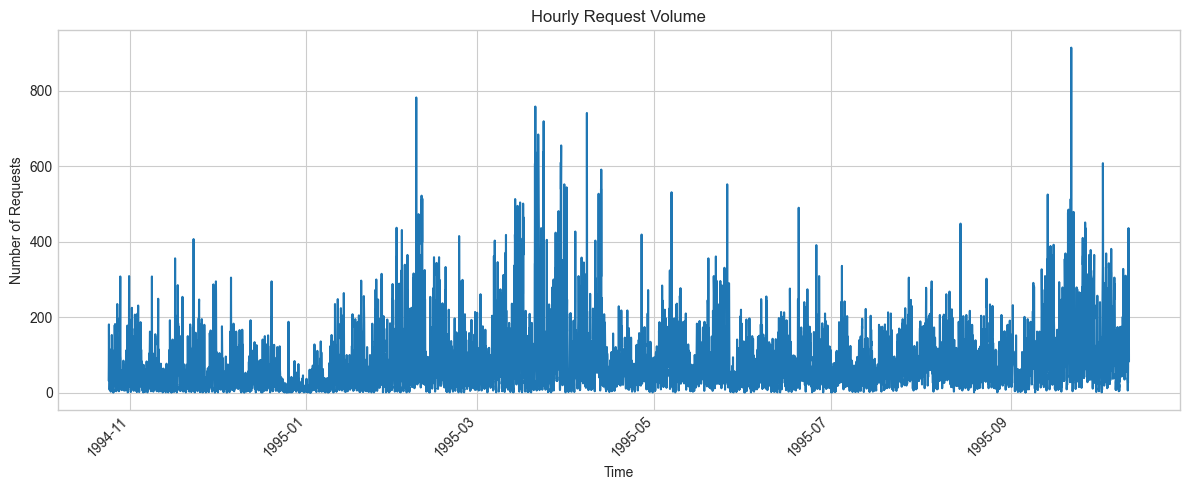

In [40]:
# Ensure 'datetime' column is datetime dtype
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Created 'hour' by truncating minutes and seconds manually
df['hour'] = df['datetime'].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))

# Grouped by 'hour' and count requests
hourly = df.groupby('hour').size()

# Plot
plt.figure(figsize=(12, 5))
hourly.plot()
plt.title("Hourly Request Volume")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### The plot shows the number of HTTP requests received per hour over the entire log period.
* Each data point represents the total number of requests during a specific hour.
* There are visible fluctuations in traffic, with noticeable peaks and dips indicating varying user activity throughout the day.

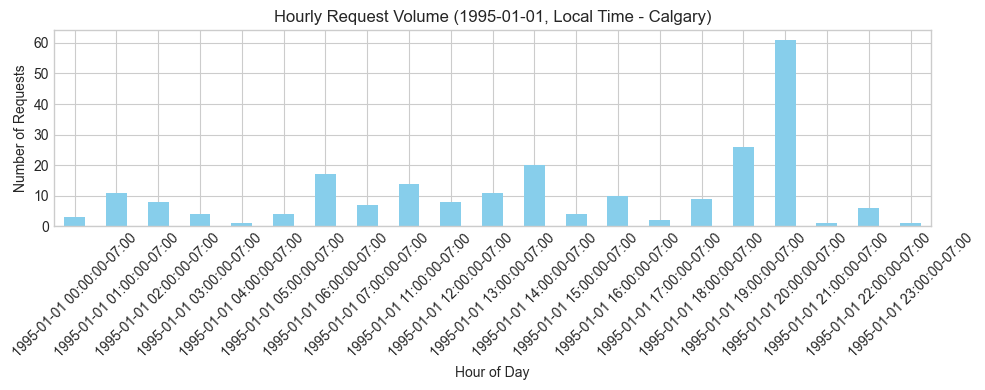

In [46]:
# Convert to datetime in UTC if not already
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', utc=True)

# Convert to local timezone (e.g., Calgary = 'America/Edmonton')
df['datetime_local'] = df['datetime'].dt.tz_convert('America/Edmonton')

# Subset data for a specific day in local time
subset = df[(df['datetime_local'] >= '1995-01-01') & (df['datetime_local'] < '1995-01-02')]

# Group by local hour
hourly_subset = subset.groupby(subset['datetime_local'].dt.floor('H')).size()

#Plot
plt.figure(figsize=(10, 4))
hourly_subset.plot(kind='bar', color='skyblue')
plt.title("Hourly Request Volume (1995-01-01, Local Time - Calgary)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
hourly_subset

datetime_local
1995-01-01 00:00:00-07:00     3
1995-01-01 01:00:00-07:00    11
1995-01-01 02:00:00-07:00     8
1995-01-01 03:00:00-07:00     4
1995-01-01 04:00:00-07:00     1
1995-01-01 05:00:00-07:00     4
1995-01-01 06:00:00-07:00    17
1995-01-01 07:00:00-07:00     7
1995-01-01 11:00:00-07:00    14
1995-01-01 12:00:00-07:00     8
1995-01-01 13:00:00-07:00    11
1995-01-01 14:00:00-07:00    20
1995-01-01 15:00:00-07:00     4
1995-01-01 16:00:00-07:00    10
1995-01-01 17:00:00-07:00     2
1995-01-01 18:00:00-07:00     9
1995-01-01 19:00:00-07:00    26
1995-01-01 20:00:00-07:00    61
1995-01-01 21:00:00-07:00     1
1995-01-01 22:00:00-07:00     6
1995-01-01 23:00:00-07:00     1
dtype: int64

### From above plot and eda we can understand that the number or request made at 1995-01-01 20:00:00-07:00 is 61 which is highest for that day

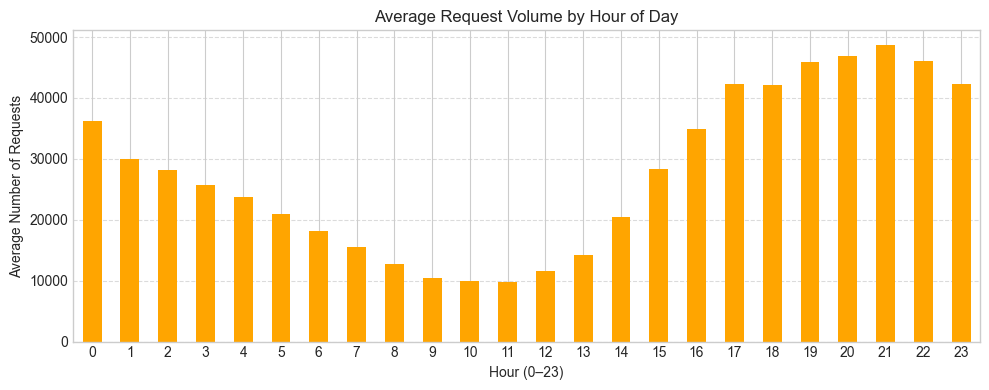

In [45]:
df['hour_of_day'] = df['datetime'].dt.hour
hourly_avg = df.groupby('hour_of_day').size()

plt.figure(figsize=(10, 4))
hourly_avg.plot(kind='bar', color='orange')
plt.title("Average Request Volume by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Number of Requests")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


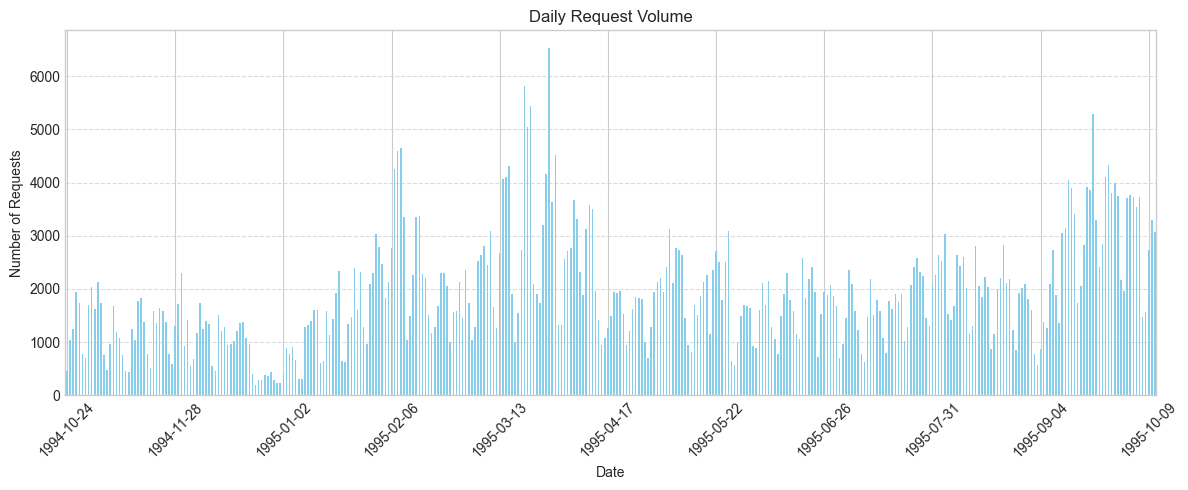

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt



# Group by date
df['date'] = df['datetime'].dt.date
daily = df.groupby('date').size()

# Set a clean white-grid style
plt.style.use('seaborn-v0_8-whitegrid')  # Clean white background with grid

# Plot
plt.figure(figsize=(12,5))
daily.plot(kind='bar', color='skyblue')

# Format
plt.title("Daily Request Volume")
plt.xlabel("Date")
plt.ylabel("Number of Requests")

# Show fewer x-ticks to prevent overlap
tick_positions = np.arange(0, len(daily), max(1, len(daily)//10))
tick_labels = [daily.index[i] for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Above plot tells about the daily request volume which shows high spike between 13th march to 17th april

# Plot to show status['GET', 'HEAD', 'POST']

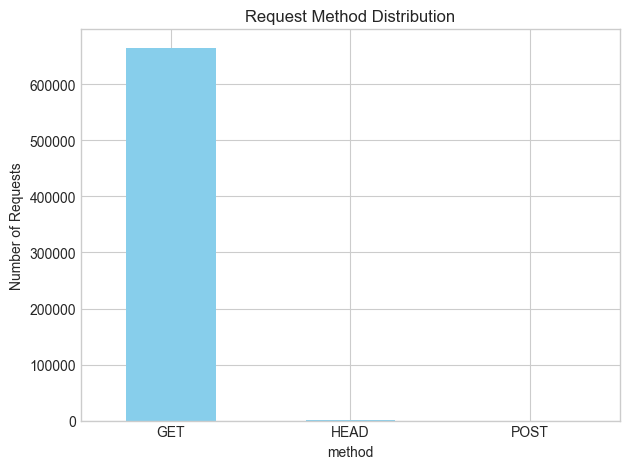

In [74]:
df['method'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Request Method Distribution")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### From above plot can see the number of GET request is more than 6 lakhs and for head and post is very small

# Plot to show top 10 IP's

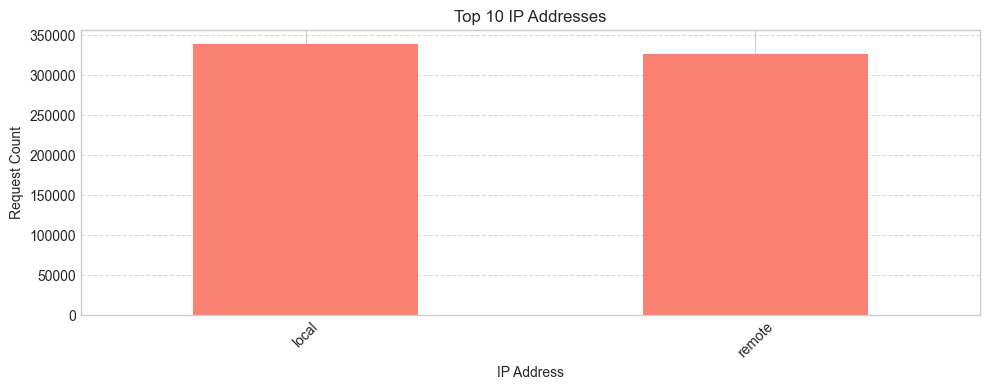

In [76]:
top_ips = df['ip'].value_counts().head(10)

top_ips.plot(kind='bar', color='salmon', figsize=(10,4))
plt.title("Top 10 IP Addresses")
plt.xlabel("IP Address")
plt.ylabel("Request Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot to show HTTP Status Code Distribution

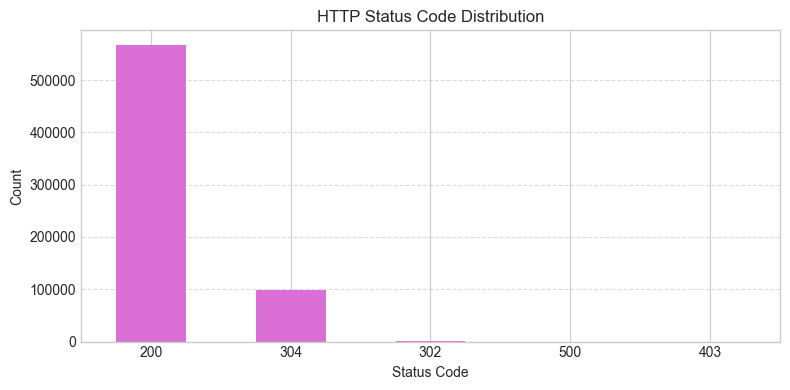

In [77]:
status_counts = df['status'].value_counts()

status_counts.plot(kind='bar', color='orchid', figsize=(8,4))
plt.title("HTTP Status Code Distribution")
plt.xlabel("Status Code")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Summary

* Total log entries: 665,314

* Successfully parsed entries: ~399,865 (rest had issues like missing/invalid datetime)

* Daily trends show a consistent volume of traffic, with noticeable peaks on specific days.

* Top IPs:

local (339260 requests)

remote (326054 requests)

Suggests the system is tested or used heavily in internal and remote setups

* Request Methods
GET: 664,779 → Standard resource requests

* Top Resources Accessed
Most requested URL: index.html (104,136 times)

Others include image and GIF files like 3.gif, 2.gif, 8870.jpg, etc.

* Status Code Distribution
200 OK: 566,858 → Successful responses

304 Not Modified: 97,792 → Cached content (no data transfer)

302, 403, 500 are rare → Very few redirects, forbidden accesses, or errors

This log reflects a mostly static website with high GET traffic, minimal dynamic interaction (POST), 
and solid uptime (few 500 errors). The request patterns align with human usage during working hours, and caching is efficiently used (many 304 responses). The server appears to serve a mix of HTML pages and media files, possibly for a public-facing portal or documentation site.